In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../../02_dataset/merged_df.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.sample(15)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,yearly_avg_rainfall,...,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,number_events,yprotest,protest_fraction
5907,NAM,1984,7.933240,0.000000,6.000000,3.425634e+09,Namibia,0.760,20.3,205.943287,...,-0.236894,16.771,0.000000,0.635998,0.000000,NaN,NaN,NaN,NaN,NaN
7292,SEN,1988,19.287075,0.000347,-1.000000,7.412287e+09,Senegal,0.781,28.2,530.801075,...,-0.816576,2.648,0.000000,0.412106,0.000000,NaN,NaN,NaN,NaN,NaN
8846,UGA,1999,34.785980,0.000000,-4.000000,1.184855e+10,Uganda,0.884,23.1,1043.536008,...,8.053942,3.454,1.053248,0.429977,0.792234,23257281.0,0.0,0.0,0.0,0.000000
6236,NER,1993,34.077090,0.000000,6.000000,3.933220e+09,Niger,0.669,27.6,114.670200,...,0.321662,1.532,-1.794872,0.368728,2.303771,9100789.0,1200.0,4.0,1.0,0.000132
5491,NaN,2011,NaN,NaN,NaN,NaN,Mauritius,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1252404.0,0.0,0.0,0.0,0.000000
1671,CHL,2022,3.462156,0.007022,1.353234,2.790662e+11,Chile,0.533,9.2,784.012476,...,2.058731,8.299,-11.002681,0.430427,-14.844751,NaN,NaN,NaN,NaN,NaN
4885,LSO,1982,16.664356,0.000000,-7.000000,6.808307e+08,Lesotho,0.278,11.9,577.696970,...,4.457207,15.405,0.000000,0.537796,0.000000,NaN,NaN,NaN,NaN,NaN
5423,MRT,1977,21.923998,0.000000,-7.000000,2.210280e+09,Mauritania,0.644,28.3,56.651328,...,-1.878587,9.287,0.000000,0.388384,0.000000,NaN,NaN,NaN,NaN,NaN
6334,NOR,1963,5.101060,0.005716,10.000000,7.801148e+10,Norway,0.024,1.5,631.063176,...,3.785028,2.493,0.000000,0.270306,0.000000,NaN,NaN,NaN,NaN,NaN
4195,ITA,1983,3.235386,0.056622,10.000000,1.266234e+12,Italy,0.064,14.0,619.181548,...,1.169207,6.076,0.000000,0.297672,1.832454,NaN,NaN,NaN,NaN,NaN


## Try modeling the sub-Saharan African countries

Choose features and target

In [4]:
feats = ['Year',
         'yearly_avg_rainfall',
         'rainfall_var_t',
         'rainfall_var_t_1',
         'mean_temp',
         'pt_gdp_agriculture',
         'oil_rent']

target = 'gdp_g'

In [5]:
subsaharan = ['AGO', 'BEN', 'BWA', 'CIV', 'CAF', 'CMR', 'COD', 'COG', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN', 'GMB', 'KEN', 'LSO', 'LBR', 'MDG', 'MLI', 'MRT', 'MUS', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SEN', 'SDN', 'SLE', 'SOM', 'SSD', 'SWZ', 'SYC', 'TCD', 'TGO', 'TZA', 'UGA', 'ZMB', 'ZWE']
sub_data = data[data['ISO3_code'].isin(subsaharan)]

In [6]:
sub_data[feats]

,Year,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,mean_temp,pt_gdp_agriculture,oil_rent
192,1960,1018.500204,0.051549,0.051549,21.6,14.902152,4.094633
193,1961,1071.002852,0.051549,0.051549,21.3,14.902152,4.094633
194,1962,979.839650,-0.085119,0.051549,21.3,14.902152,4.094633
195,1963,967.382233,-0.012714,-0.085119,21.3,14.902152,4.094633
196,1964,833.767522,-0.138120,-0.012714,21.3,14.902152,4.094633
...,...,...,...,...,...,...,...
9317,2019,647.373718,0.176221,-0.316445,22.4,9.819262,0.050883
9318,2020,586.835256,-0.093514,0.176221,22.0,8.772859,0.029129
9319,2021,543.462821,-0.073909,-0.093514,22.0,8.849899,0.047769
9320,2022,635.176282,0.168758,-0.073909,21.9,7.170550,0.000000


In [7]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(sub_data, 
                                                    shuffle=True,
                                                    random_state=216,
                                                    test_size=.2)
df_tt, df_val = train_test_split(df_train, 
                                                    shuffle=True,
                                                    random_state=216,
                                                    test_size=.2)


In [8]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import root_mean_squared_error

Initial model selection: just run a set of models, mostly ensemble methods, with default hyperparameters and on training data. We will choose the best one using RMSE as a metric and then further pick the best hyperparameters using cross validation.

In [13]:
models = {
    'ols': LinearRegression(),
    'rf': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'ada': AdaBoostRegressor(),
    'xgbr': XGBRegressor(),
    'svr': SVR(),
    'grad': GradientBoostingRegressor(),
    'knr': KNeighborsRegressor(5)
}

res = []
for name, model in models.items():
    model.fit(df_tt[feats], df_tt[target])
    preds = model.predict(df_val[feats])
    rmse = root_mean_squared_error(df_val[target], preds)

    print(f"{name}, rmse: {rmse}")
    res.append(rmse)

ols, rmse: 0.06827070330302251
rf, rmse: 0.062477753749042755
extra_trees, rmse: 0.06375917039925087
ada, rmse: 0.07223354318918629
xgbr, rmse: 0.06425829507127696
svr, rmse: 0.07068276556227954
grad, rmse: 0.0651036737369271
knr, rmse: 0.07246681820896303


/tmp/ipykernel_298649/791505792.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45)


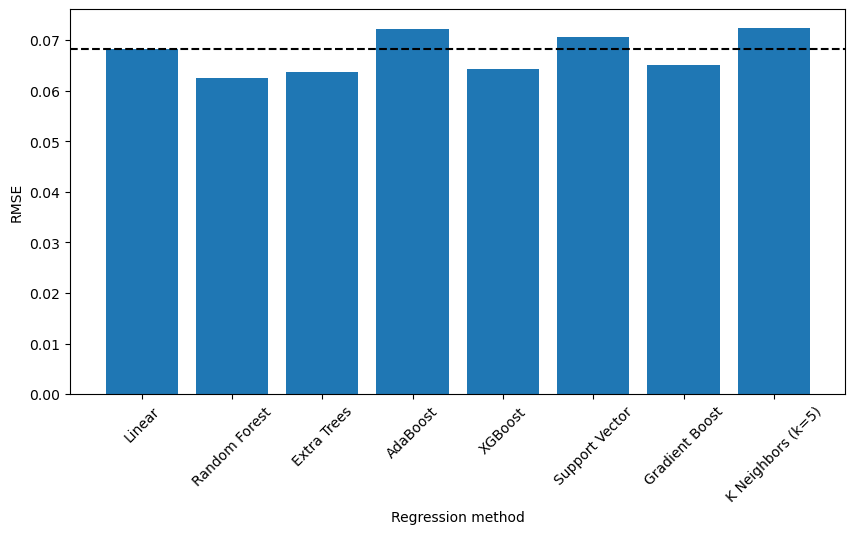

In [19]:
# bar chart for the results
model_names = ('Linear', 'Random Forest', 'Extra Trees',
               'AdaBoost', 
               'XGBoost',
               'Support Vector',
               'Gradient Boost',
               'K Neighbors (k=5)')

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(model_names, res)
ax.set_xticklabels(model_names, rotation=45)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regression method')
ax.axhline(res[0], color='k', linestyle='dashed')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(ExtraTreesRegressor(),
                       param_grid={
                           'max_depth': [5, 10, 15, 20],
                           'n_estimators': range(100,1000, 100)
                       },
                       scoring='neg_root_mean_squared_error',
                       cv=5
                       )

grid_cv.fit(df_train[feats], df_train[target])

print(grid_cv.best_score_, grid_cv.best_params_)

-0.05871946864094143 {'max_depth': 15, 'n_estimators': 700}


In [12]:
grid_cv = GridSearchCV(XGBRegressor(),
                       param_grid={
                           'max_depth': [1, 5, 10],
                           'learning_rate': [0.001, 0.01, 0.1],
                           'n_estimators': [100, 500, 700]
                       },
                       scoring='neg_root_mean_squared_error',
                       cv=5
                       )

grid_cv.fit(df_train[feats], df_train[target])

print(grid_cv.best_score_, grid_cv.best_params_)

-0.059560477384699315 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [20]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

In [21]:
ebm = ExplainableBoostingRegressor(interactions=0)
ebm.fit(df_train[feats], df_train[target])

ExplainableBoostingRegressor(interactions=0)

In [22]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/140059427448944/ -->

In [23]:
ebm = ExplainableBoostingRegressor(interactions=10)
ebm.fit(df_train[feats], df_train[target])
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/140061548959584/ -->

## Try the same with with the dummy variables

In [ ]:
cols = []
for code in sub_data['ISO3_code'].unique():
    sub_data[code] = pd.get_dummies(sub_data['ISO3_code'])[code]*1
    sub_data[f'{code}_year'] = sub_data[code] * sub_data['Year']
    cols.append(code)
    cols.append(f'{code}_year')
sub_data.columns

/tmp/ipykernel_8151/1198250775.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8151/1198250775.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8151/1198250775.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8151

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall',
       ...
       'TZA', 'TZA_year', 'TGO', 'TGO_year', 'UGA', 'UGA_year', 'ZMB',
       'ZMB_year', 'ZWE', 'ZWE_year'],
      dtype='object', length=103)

In [ ]:
df_train, df_test = train_test_split(sub_data, 
                                                    shuffle=True,
                                                    random_state=216,
                                                    test_size=.2)
df_tt, df_val = train_test_split(df_train, 
                                                    shuffle=True,
                                                    random_state=216,
                                                    test_size=.2)

In [ ]:
models = {
    'ols': LinearRegression(),
    'rf': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'ada': AdaBoostRegressor(),
    'xgbr': XGBRegressor(),
    'svr': SVR(),
    'grad': GradientBoostingRegressor(),
    'knr': KNeighborsRegressor(5)
}

for name, model in models.items():
    model.fit(df_tt[feats], df_tt[target])
    preds = model.predict(df_val[feats])
    rmse = root_mean_squared_error(df_val[target], preds)

    print(f"{name}, rmse: {rmse}")

ols, rmse: 0.06827070330302251
rf, rmse: 0.06354061944832952
extra_trees, rmse: 0.06337302482743114
ada, rmse: 0.07183026918258664
xgbr, rmse: 0.06425829507127696
svr, rmse: 0.07068276556227954
grad, rmse: 0.06510227641006888
knr, rmse: 0.07246681820896303


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(ExtraTreesRegressor(),
                       param_grid={
                           'max_depth': [5, 10],
                           'n_estimators': [100]
                       },
                       scoring='neg_root_mean_squared_error',
                       cv=5
                       )

grid_cv.fit(df_train[feats], df_train[target])

print(grid_cv.best_score_, grid_cv.best_params_)

-0.059029599482301 {'max_depth': 10, 'n_estimators': 100}


In [ ]:
grid_cv = GridSearchCV(XGBRegressor(),
                       param_grid={
                           'max_depth': [1, 5,10],
                           'learning_rate': [0.01, 0.1, 1],
                           'n_estimators': [100, 500]
                       },
                       scoring='neg_root_mean_squared_error',
                       cv=5
                       )

grid_cv.fit(df_train[feats], df_train[target])

print(grid_cv.best_score_, grid_cv.best_params_)

-0.059560477384699315 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
ebm = ExplainableBoostingRegressor(interactions=0)
ebm.fit(df_train[feats], df_train[target])
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/140162796482112/ -->

In [ ]:
ebm = ExplainableBoostingRegressor(interactions=10)
ebm.fit(df_train[feats], df_train[target])
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/140162028782608/ -->